In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04 00:00:00+00:00,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05 00:00:00+00:00,6.465664,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07 00:00:00+00:00,6.351056,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08 00:00:00+00:00,6.393280,7.570714,7.571429,7.466429,7.510714,447610800


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-59-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


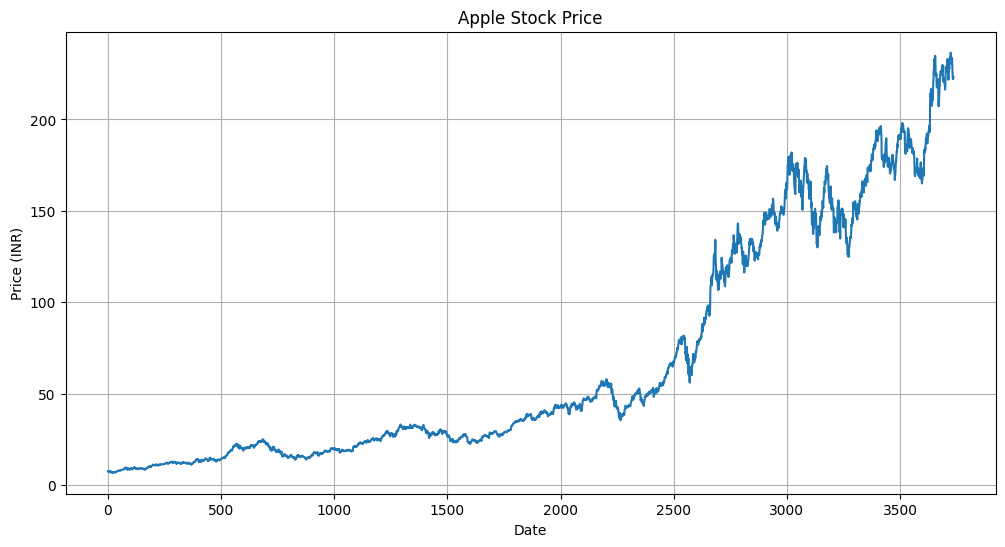

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...
3732,225.910004,229.830002,225.369995,229.339996,64370100
3733,222.910004,225.350006,220.270004,220.970001,65276700
3734,222.009995,222.789993,219.710007,220.990005,44944500


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3732,223.339200
3733,223.496801
3734,223.586200
3735,223.678300


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

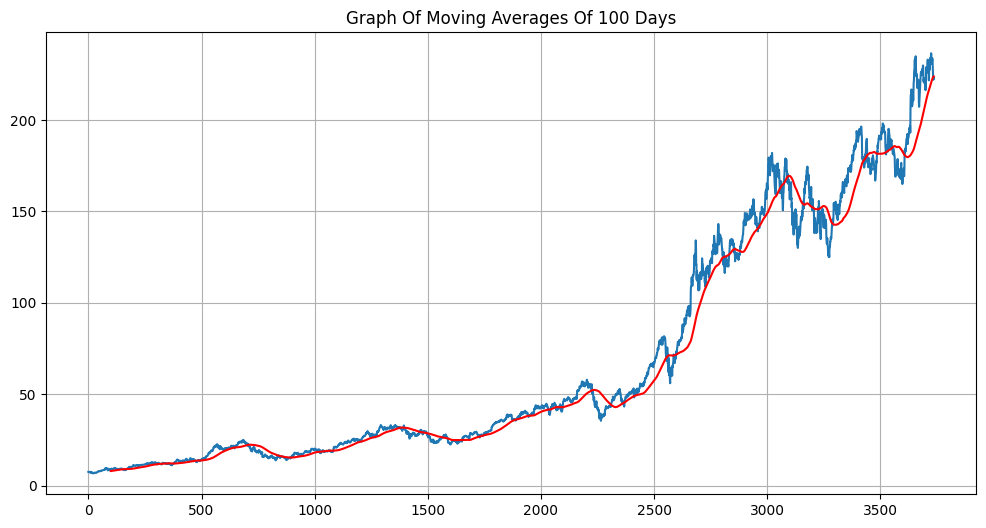

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3732,201.98105
3733,202.15245
3734,202.30470
3735,202.45250


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

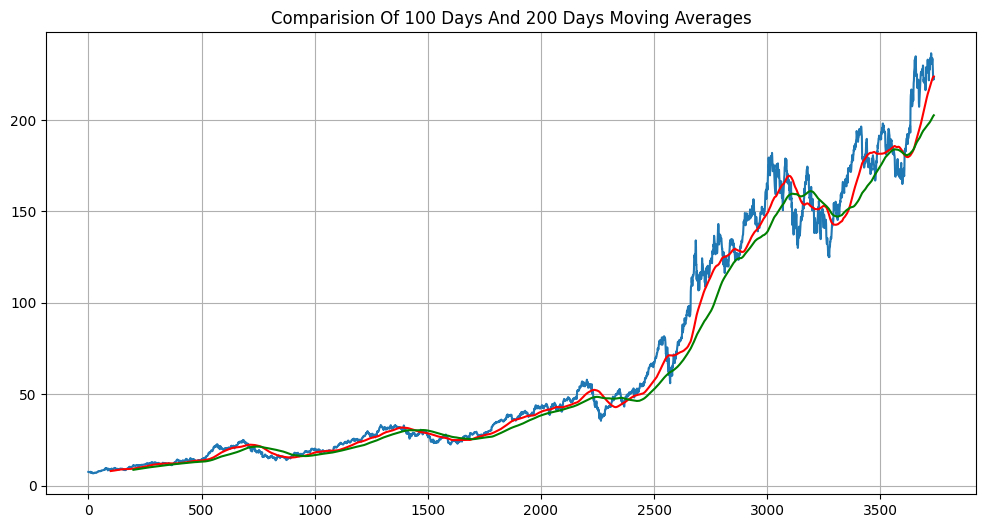

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3737, 5)

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2615, 7)
(1122, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04 00:00:00+00:00,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05 00:00:00+00:00,6.465664,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07 00:00:00+00:00,6.351056,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08 00:00:00+00:00,6.393280,7.570714,7.571429,7.466429,7.510714,447610800


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
2615,2020-05-26 00:00:00+00:00,77.241440,79.182503,81.059998,79.125000,80.875000,125522000
2616,2020-05-27 00:00:00+00:00,77.577957,79.527496,79.677498,78.272499,79.035004,112945200
2617,2020-05-28 00:00:00+00:00,77.612099,79.562500,80.860001,78.907501,79.192497,133560800
2618,2020-05-29 00:00:00+00:00,77.536507,79.485001,80.287498,79.117500,79.812500,153532400
2619,2020-06-01 00:00:00+00:00,78.490051,80.462502,80.587502,79.302498,79.437500,80791200


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01067432],
       [0.01109396],
       [0.0098881 ],
       ...,
       [0.97693897],
       [0.97474432],
       [0.97298862]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2515, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 327ms/step - loss: 0.0552 - mean_absolute_error: 0.1632
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - loss: 0.0052 - mean_absolute_error: 0.0507
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 301ms/step - loss: 0.0048 - mean_absolute_error: 0.0484
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0048 - mean_absolute_error: 0.0462
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - loss: 0.0034 - mean_absolute_error: 0.0391
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - loss: 0.0036 - mean_absolute_error: 0.0393
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - loss: 0.0035 - mean_absolute_error: 0.0393
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - loss: 0.0029 - mean_absolute_error: 0.0357
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - loss: 0.0029 - mean_absolute_error: 0.0348
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 282ms/step - loss: 0.0025 - mean_absolute_error: 0.0333


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1122, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days,test_df],ignore_index=True)

In [ ]:
final_df.head()

,0
0,72.379997
1,73.797501
2,74.125000
3,73.187500
4,74.370003


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10605495],
       [0.11387361],
       [0.11568003],
       ...,
       [0.91869722],
       [0.92658477],
       [0.92686058]])

In [ ]:
input_data.shape

(1222, 1)

In [ ]:
#Testing the model

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1122, 100, 1)
(1122,)


In [ ]:
#Making prediction and plotting the graph of predicted vs actual values

In [ ]:
y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step


In [ ]:
y_pred.shape

(1122, 1)

In [ ]:
y_test

array([0.14325901, 0.13855679, 0.14205933, ..., 0.91869722, 0.92658477,
       0.92686058])

In [ ]:
y_pred

array([[0.10939472],
       [0.11078418],
       [0.11215768],
       ...,
       [0.8807601 ],
       [0.88028246],
       [0.87868327]], dtype=float32)

In [ ]:
scaler.scale_

array([0.0055158])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

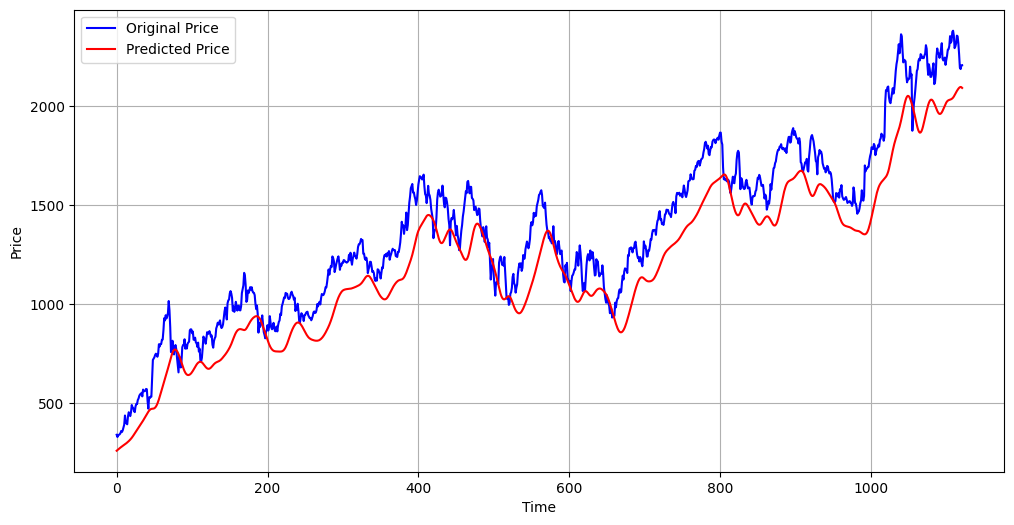

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 12.17%


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.804455935651478


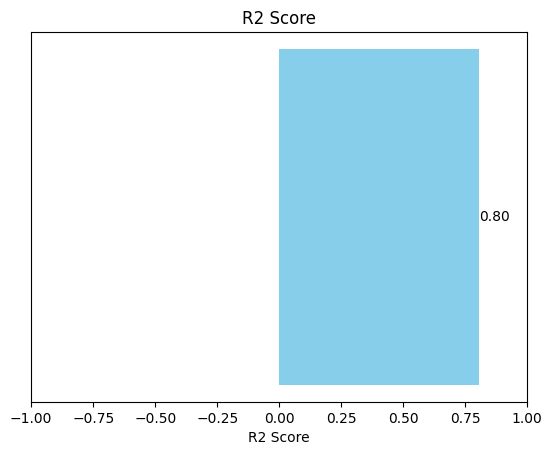

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

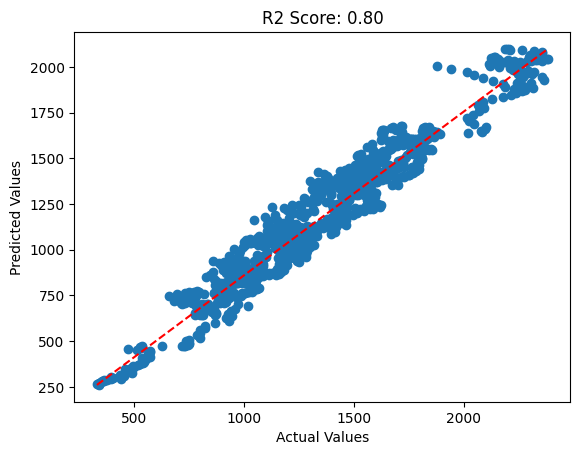

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()